<a href="https://colab.research.google.com/github/SudhanshuSekharNaik/tubercluosis_prediction/blob/main/tb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TUBERCULOSIS PREDICTION USING LOGISTIC REGRESSION

1. GENERATING DATASET...
=== TUBERCULOSIS DATASET OVERVIEW ===
Total samples: 400
TB Patients: 200 (50.0%)
Controls: 200 (50.0%)


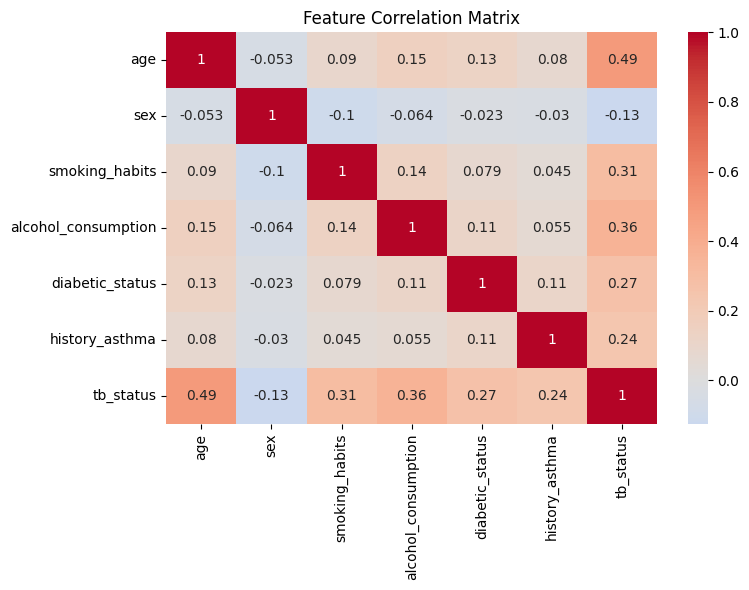


2. PREPROCESSING DATA...
Training set: 280 samples
Testing set: 120 samples

3. TRAINING MODEL...
✅ Logistic Regression model trained successfully

4. MODEL EVALUATION...
=== MODEL PERFORMANCE METRICS ===
Accuracy:    0.8583
Precision:   0.8772
Recall:      0.8333
F1-Score:    0.8547
AUC Score:   0.9125
Sensitivity: 0.8333
Specificity: 0.8333

=== CONFUSION MATRIX ===
True Positives:  50
True Negatives:  53
False Positives: 7
False Negatives: 10

=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

     Control       0.84      0.88      0.86        60
  TB Patient       0.88      0.83      0.85        60

    accuracy                           0.86       120
   macro avg       0.86      0.86      0.86       120
weighted avg       0.86      0.86      0.86       120


5. KEY VISUALIZATIONS...


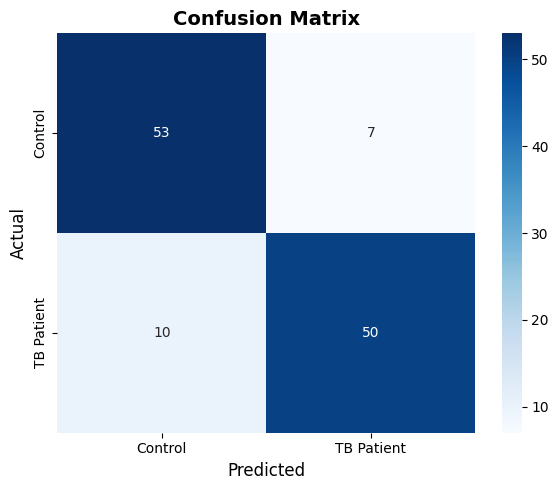

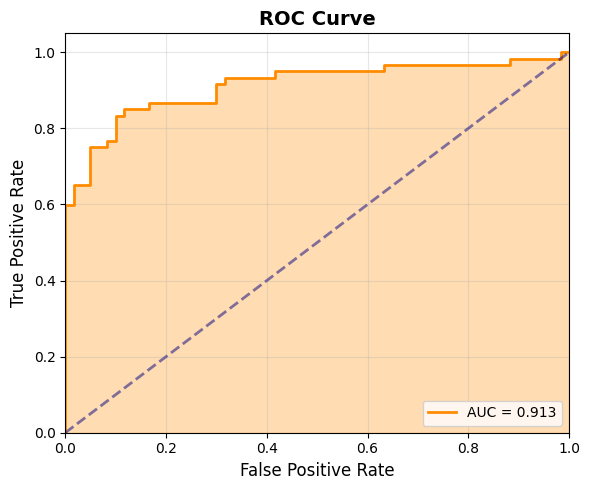

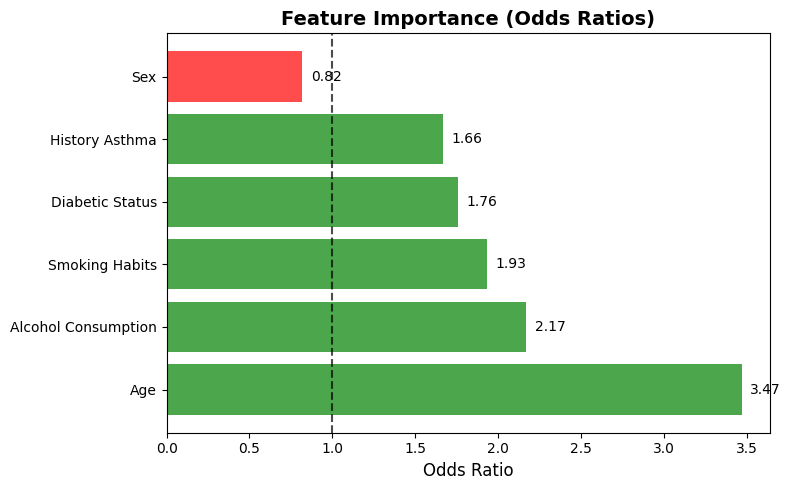


6. PATIENT PREDICTIONS...

--- High-risk patient ---

=== PATIENT RISK ASSESSMENT ===
TB Probability: 0.999 (99.9%)
Prediction: TB PATIENT
Risk Level: HIGH RISK
Recommendation: Immediate attention

--- Low-risk patient ---

=== PATIENT RISK ASSESSMENT ===
TB Probability: 0.051 (5.1%)
Prediction: CONTROL
Risk Level: LOW RISK
Recommendation: Routine monitoring

--- Medium-risk patient ---

=== PATIENT RISK ASSESSMENT ===
TB Probability: 0.869 (86.9%)
Prediction: TB PATIENT
Risk Level: HIGH RISK
Recommendation: Immediate attention

FINAL SUMMARY
Accuracy: 0.858
AUC Score: 0.913
Sensitivity: 0.833
Specificity: 0.883


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report,
                           confusion_matrix, roc_auc_score, roc_curve,
                           precision_score, recall_score, f1_score)
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

class TuberculosisPredictor:
    def __init__(self):
        self.model = None
        self.scaler = StandardScaler()
        self.feature_names = ['age', 'sex', 'smoking_habits', 'alcohol_consumption',
                            'diabetic_status', 'history_asthma']

    def generate_tb_data(self, n_samples=400):
        """Generate tuberculosis dataset based on clinical risk factors"""
        np.random.seed(42)

        data = []

        for i in range(n_samples):
            # Generate TB patients (50% of dataset)
            if i < n_samples // 2:
                # Higher risk profiles for TB patients
                age = np.random.normal(50, 15)  # Older age
                sex = np.random.choice([0, 1], p=[0.55, 0.45])  # Slight male predominance
                smoking = np.random.choice([0, 1, 2], p=[0.4, 0.3, 0.3])  # More smokers
                alcohol = np.random.choice([0, 1, 2], p=[0.5, 0.3, 0.2])  # More drinkers
                diabetic = np.random.choice([0, 1], p=[0.7, 0.3])  # More diabetics
                asthma = np.random.choice([0, 1], p=[0.75, 0.25])  # More asthma
                tb_status = 1
            else:
                # Lower risk profiles for controls
                age = np.random.normal(35, 12)  # Younger age
                sex = np.random.choice([0, 1], p=[0.45, 0.55])  # Slight female predominance
                smoking = np.random.choice([0, 1, 2], p=[0.7, 0.2, 0.1])  # Fewer smokers
                alcohol = np.random.choice([0, 1, 2], p=[0.8, 0.15, 0.05])  # Fewer drinkers
                diabetic = np.random.choice([0, 1], p=[0.9, 0.1])  # Fewer diabetics
                asthma = np.random.choice([0, 1], p=[0.9, 0.1])  # Less asthma
                tb_status = 0

            # Ensure age is within reasonable bounds
            age = max(15, min(85, age))

            data.append([age, sex, smoking, alcohol, diabetic, asthma, tb_status])

        df = pd.DataFrame(data, columns=self.feature_names + ['tb_status'])
        return df

    def explore_dataset(self, df):
        """Show dataset summary without detailed graphs"""
        print("=== TUBERCULOSIS DATASET OVERVIEW ===")
        print(f"Total samples: {len(df)}")
        print(f"TB Patients: {df['tb_status'].sum()} ({df['tb_status'].mean():.1%})")
        print(f"Controls: {len(df) - df['tb_status'].sum()} ({1 - df['tb_status'].mean():.1%})")

        # Simple correlation matrix (replaces multiple distribution plots)
        plt.figure(figsize=(8, 6))
        correlation = df.corr()
        sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
        plt.title('Feature Correlation Matrix')
        plt.tight_layout()
        plt.show()

        return df

    def preprocess_data(self, df):
        """Prepare data for logistic regression"""
        X = df[self.feature_names]
        y = df['tb_status']

        # Scale features
        X_scaled = self.scaler.fit_transform(X)

        return X_scaled, y

    def train_logistic_model(self, X_train, y_train):
        """Train logistic regression model"""
        self.model = LogisticRegression(
            random_state=42,
            max_iter=1000,
            solver='liblinear',
            C=1.0
        )

        self.model.fit(X_train, y_train)
        print("✅ Logistic Regression model trained successfully")
        return self.model

    def plot_confusion_matrix(self, y_true, y_pred):
        """Create a clear confusion matrix"""
        cm = confusion_matrix(y_true, y_pred)
        tn, fp, fn, tp = cm.ravel()

        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Control', 'TB Patient'],
                    yticklabels=['Control', 'TB Patient'])

        plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
        plt.xlabel('Predicted', fontsize=12)
        plt.ylabel('Actual', fontsize=12)
        plt.tight_layout()
        plt.show()

        return cm

    def plot_roc_curve(self, X, y):
        """Plot ROC curve with AUC score"""
        y_pred_proba = self.model.predict_proba(X)[:, 1]
        fpr, tpr, thresholds = roc_curve(y, y_pred_proba)
        auc_score = roc_auc_score(y, y_pred_proba)

        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc_score:.3f}')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.5)
        plt.fill_between(fpr, tpr, alpha=0.3, color='darkorange')

        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate', fontsize=12)
        plt.ylabel('True Positive Rate', fontsize=12)
        plt.title('ROC Curve', fontsize=14, fontweight='bold')
        plt.legend(loc="lower right")
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        return auc_score

    def plot_feature_importance(self):
        """Plot key feature importance"""
        if self.model is None:
            print("Model not trained yet!")
            return

        coefficients = self.model.coef_[0]
        odds_ratios = np.exp(coefficients)

        # Create feature importance dataframe
        feature_importance = pd.DataFrame({
            'Feature': [f.replace('_', ' ').title() for f in self.feature_names],
            'Coefficient': coefficients,
            'Odds_Ratio': odds_ratios
        }).sort_values('Odds_Ratio', ascending=False)

        # Plot
        plt.figure(figsize=(8, 5))
        colors = ['red' if x < 1 else 'green' for x in feature_importance['Odds_Ratio']]
        bars = plt.barh(feature_importance['Feature'], feature_importance['Odds_Ratio'],
                       color=colors, alpha=0.7)

        plt.axvline(x=1, color='black', linestyle='--', alpha=0.7)
        plt.xlabel('Odds Ratio', fontsize=12)
        plt.title('Feature Importance (Odds Ratios)', fontsize=14, fontweight='bold')

        # Add value labels
        for bar, value in zip(bars, feature_importance['Odds_Ratio']):
            plt.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2,
                    f'{value:.2f}', va='center', fontsize=10)

        plt.tight_layout()
        plt.show()

        return feature_importance

    def evaluate_model(self, X_test, y_test):
        """Comprehensive model evaluation"""
        y_pred = self.model.predict(X_test)
        y_pred_proba = self.model.predict_proba(X_test)[:, 1]

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc_score = roc_auc_score(y_test, y_pred_proba)

        # Confusion matrix components
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)

        print("=== MODEL PERFORMANCE METRICS ===")
        print(f"Accuracy:    {accuracy:.4f}")
        print(f"Precision:   {precision:.4f}")
        print(f"Recall:      {recall:.4f}")
        print(f"F1-Score:    {f1:.4f}")
        print(f"AUC Score:   {auc_score:.4f}")
        print(f"Sensitivity: {sensitivity:.4f}")
        print(f"Specificity: {sensitivity:.4f}")

        print("\n=== CONFUSION MATRIX ===")
        print(f"True Positives:  {tp}")
        print(f"True Negatives:  {tn}")
        print(f"False Positives: {fp}")
        print(f"False Negatives: {fn}")

        print("\n=== CLASSIFICATION REPORT ===")
        print(classification_report(y_test, y_pred,
                                  target_names=['Control', 'TB Patient']))

        return {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'auc_score': auc_score,
            'sensitivity': sensitivity,
            'specificity': specificity
        }

    def predict_patient_risk(self, patient_features):
        """Predict TB risk for individual patient"""
        if self.model is None:
            print("Model not trained yet!")
            return

        # Scale and predict
        features_array = np.array(patient_features).reshape(1, -1)
        features_scaled = self.scaler.transform(features_array)
        probability = self.model.predict_proba(features_scaled)[0, 1]
        prediction = self.model.predict(features_scaled)[0]

        print("\n=== PATIENT RISK ASSESSMENT ===")
        print(f"TB Probability: {probability:.3f} ({probability:.1%})")
        print(f"Prediction: {'TB PATIENT' if prediction == 1 else 'CONTROL'}")

        # Risk level classification
        if probability < 0.3:
            risk_level = "LOW RISK"
            recommendation = "Routine monitoring"
        elif probability < 0.7:
            risk_level = "MEDIUM RISK"
            recommendation = "Further investigation"
        else:
            risk_level = "HIGH RISK"
            recommendation = "Immediate attention"

        print(f"Risk Level: {risk_level}")
        print(f"Recommendation: {recommendation}")

        return probability, prediction

def main():
    """Main function to run tuberculosis prediction pipeline"""
    print("TUBERCULOSIS PREDICTION USING LOGISTIC REGRESSION")
    print("=" * 50)

    # Initialize predictor
    predictor = TuberculosisPredictor()

    # Step 1: Generate and explore data
    print("\n1. GENERATING DATASET...")
    tb_data = predictor.generate_tb_data(400)
    predictor.explore_dataset(tb_data)

    # Step 2: Preprocess data
    print("\n2. PREPROCESSING DATA...")
    X, y = predictor.preprocess_data(tb_data)

    # Step 3: Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    print(f"Training set: {X_train.shape[0]} samples")
    print(f"Testing set: {X_test.shape[0]} samples")

    # Step 4: Train model
    print("\n3. TRAINING MODEL...")
    predictor.train_logistic_model(X_train, y_train)

    # Step 5: Evaluate model
    print("\n4. MODEL EVALUATION...")
    metrics = predictor.evaluate_model(X_test, y_test)

    # Step 6: Essential visualizations only
    print("\n5. KEY VISUALIZATIONS...")

    # Confusion Matrix
    y_pred = predictor.model.predict(X_test)
    predictor.plot_confusion_matrix(y_test, y_pred)

    # ROC Curve
    auc_score = predictor.plot_roc_curve(X_test, y_test)

    # Feature Importance
    feature_importance = predictor.plot_feature_importance()

    # Step 7: Individual predictions
    print("\n6. PATIENT PREDICTIONS...")

    # Example patients
    test_patients = [
        [65, 1, 2, 2, 1, 1],  # High-risk
        [25, 0, 0, 0, 0, 0],  # Low-risk
        [45, 1, 1, 1, 1, 0]   # Medium-risk
    ]

    descriptions = ["High-risk patient", "Low-risk patient", "Medium-risk patient"]

    for i, (patient, desc) in enumerate(zip(test_patients, descriptions), 1):
        print(f"\n--- {desc} ---")
        predictor.predict_patient_risk(patient)

    # Final summary
    print("\n" + "=" * 50)
    print("FINAL SUMMARY")
    print("=" * 50)
    print(f"Accuracy: {metrics['accuracy']:.3f}")
    print(f"AUC Score: {metrics['auc_score']:.3f}")
    print(f"Sensitivity: {metrics['sensitivity']:.3f}")
    print(f"Specificity: {metrics['specificity']:.3f}")

if __name__ == "__main__":
    main()